In [1]:
import sys
sys.path.append("../..")
sys.path.append("..")

import hee
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import defaultdict
import hypernetx as hnx

In [2]:
filepath = "../../data/zoo/zoo.data"
he_names = [
    "animal_name",
    "hair",
    "feathers",
    "eggs",
    "milk",
    "airborne",
    "aquatic",
    "predator",
    "toothed",
    "backbone",
    "breathes",
    "venomous",
    "fins",
    "legs",
    "tail",
    "domestic",
    "catsize",
    "type"
]

In [7]:
filepath = "../../data/mushroom/agaricus-lepiota.data"
he_names = [
    "edible/poisonous",
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat"
]

df = pd.read_csv(filepath, names=he_names)

hes2v = defaultdict(lambda: [])
to_ignore = ["edible/poisonous", "stalk-root"]

In [29]:
df.head(10)

,edible/poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [9]:
for column in df:
    if column in to_ignore:
        continue

    groups = df.groupby([column])
    for key, item in groups:
        he_name = column + "_" + key
        hes2v[he_name] = item.index.values #vertices

In [13]:
h = hnx.Hypergraph(hes2v)

In [3]:
df = pd.read_csv(filepath, names=he_names)
h, v2hes, hes2v = hee.read_data(filepath, he_names, ["animal_name", "type"])

In [4]:
zhou = hee.spectral_methods.Zhou(h, None, norm_de=True)
emb_zhou = zhou.fit(dim=3)

In [5]:
luo = hee.spectral_methods.Luo(h, None)
emb_luo = luo.fit(np.identity(h.number_of_nodes()), dim=3)

In [6]:
rod = hee.spectral_methods.Rodriguez(h, None)
emb_rod = rod.fit(dim=3)

In [7]:
L_saito = hee.get_hypergraph_laplacian(h, mode="Saito")
emb_saito = hee.embed_hypergraph(L_saito, dim=3)

H has hyperedges of size 1. Modifying inf to 0.


/Users/mirko/Downloads/HEE/hee/notebook/../../hee/utils/matrix.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  new_diag.append(1.0/value)


In [8]:
saito = hee.spectral_methods.Saito(h, None)
emb_saito = saito.fit(dim=3)

H has hyperedges of size 1. Modifying inf to 0.


In [9]:
L_ren = hee.get_hypergraph_laplacian(h, mode='Ren')

X_ren = hee.embed_hypergraph(L_ren, dim=6, sprs=True)
X_ren_reduced = PCA(n_components=2).fit_transform(X_ren)

X1_ren = hee.embed_hypergraph(L_ren, indices=[1,2])

In [10]:
ren = hee.spectral_methods.Ren(h, None)
emb_ren = ren.fit(dim=3, pca=True)

In [11]:
bolla = hee.spectral_methods.Bolla(h)
emb_bolla = bolla.fit(dim=3)

In [11]:
L_smhc = hee.smhc([h])

X_smhc = hee.embed_hypergraph(L_smhc, indices=[1, 2])
X1_smhc = hee.embed_hypergraph(L_smhc, indices=[2, 3])

In [12]:
L_hhe = hee.get_hypergraph_laplacian(h, mode="hhe")

X_hhe = hee.embed_hypergraph(L_hhe, indices=[1,2])
X1_hhe = hee.embed_hypergraph(L_hhe, indices=[2,3])

# Plotting the embedding

In [12]:
m, id2n, id2e = h.edges.incidence_matrix(sparse=True, index=True)
n2id = {v:k for k,v in id2n.items()}

In [13]:
colors = []
t2c = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

t2c2 = {"e": "#1f77b4", "p": "#ff7f0e"}
for animal, nid in n2id.items():
    #_type = df.iloc[int(animal)]["edible/poisonous"]
    #print(animal, _type.iloc[0])
    #colors.append(t2c2[_type])

    _type = df[df["animal_name"] == animal].type
    #print(animal, _type.iloc[0])
    colors.append(t2c[_type.iloc[0]])

In [14]:
import matplotlib.pyplot as plt

def plot3d(X):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=colors)
    plt.show()

## Zhou

Zhou


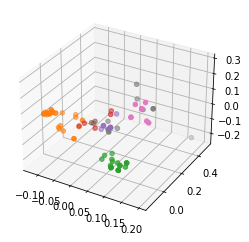

Luo


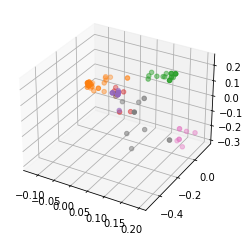

Rodriguez


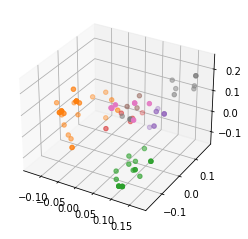

Saito


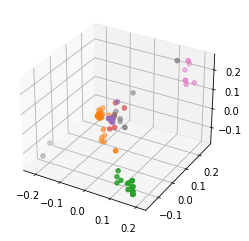

Ren


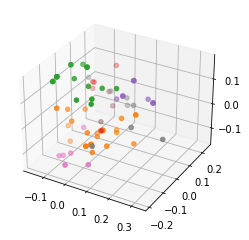

Bolla


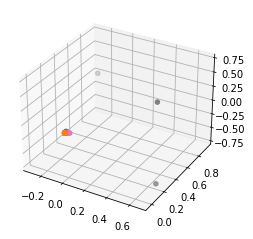

In [15]:
print("Zhou")
plot3d(emb_zhou)
print("Luo")
plot3d(emb_luo)
print("Rodriguez")
plot3d(emb_rod)
print("Saito")
plot3d(emb_saito)
print("Ren")
plot3d(emb_ren)
print("Bolla")
plot3d(emb_bolla)

## HHE

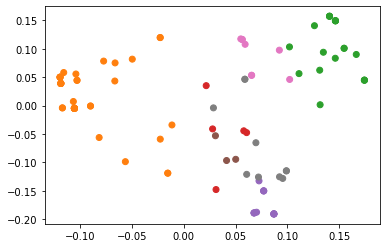

In [23]:
plt.scatter(X1_ren[:, 0], X1_ren[:, 1], c=colors)

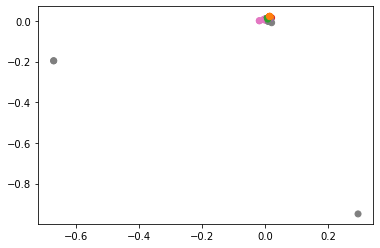

In [24]:
plt.scatter(X_hhe[:, 0], X_hhe[:, 1], c=colors)

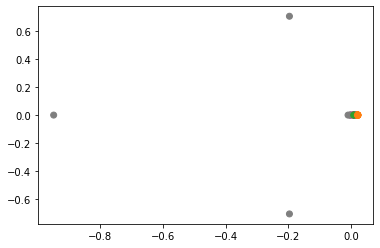

In [25]:
plt.scatter(X1_hhe[:, 0], X1_hhe[:, 1], c=colors)